# messed up with svd.

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np

k = 60000 * 0.2
transform = transforms.Compose([transforms.ToTensor()])
flatten = transforms.Lambda(lambda x: x.flatten())
to_img = lambda x: transforms.ToPILImage()(torch.tensor(x).view(28, 28))

trainset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
X = np.stack([x.flatten() for idx, (x, _) in enumerate(trainset) if idx < k])

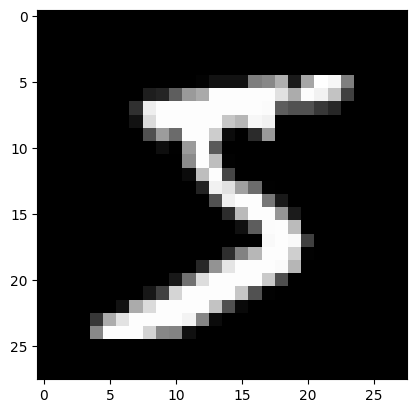

In [2]:
import matplotlib.pyplot as plt
plt.imshow(to_img(X[0]), cmap='gray') # show the first image

In [3]:
# SVD decomposition.
# Will crash for full MNIST dataset.
U, S, Vh = np.linalg.svd(X) 
# print(U.shape)
# print(np.diag(S).shape)
# print(Vh.shape)

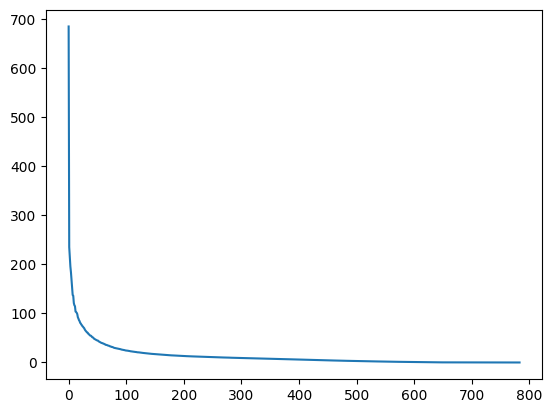

In [4]:
plt.plot(S)

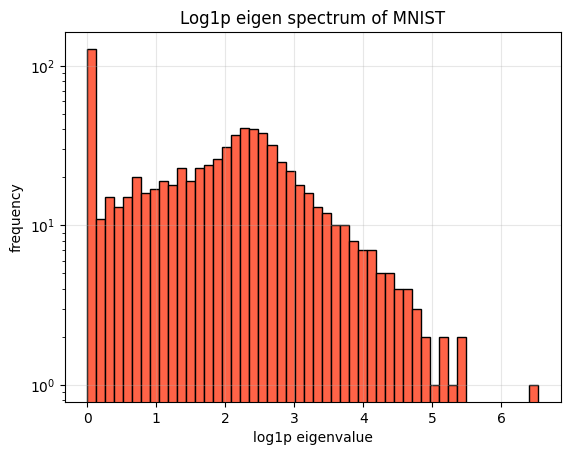

In [5]:
logsvs = np.log1p(S)
plt.hist(logsvs, bins=50, color='tomato', edgecolor='black')
plt.title("Log1p eigen spectrum of MNIST")
plt.grid(alpha=0.3)
plt.xlabel('log1p eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
plt.show();

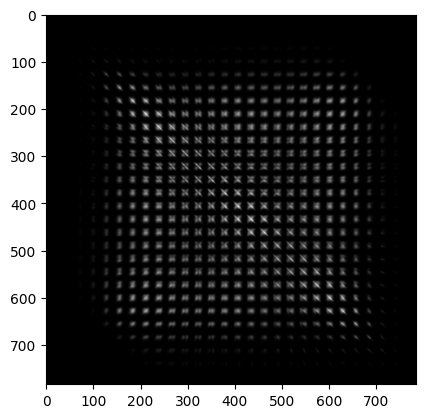

In [6]:
cov = X.T@X
plt.imshow(cov, cmap='gray');

In [7]:
eigv = np.linalg.eigvals(cov)

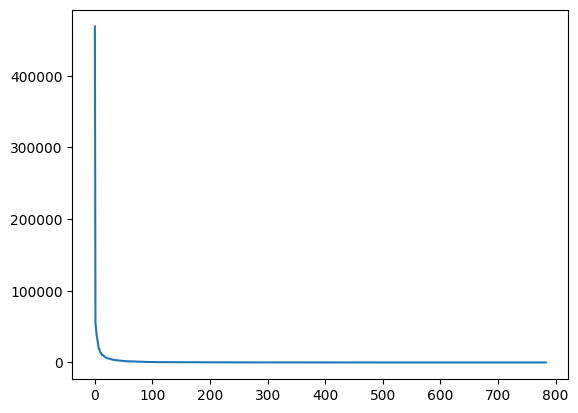

In [8]:
plt.plot(eigv)

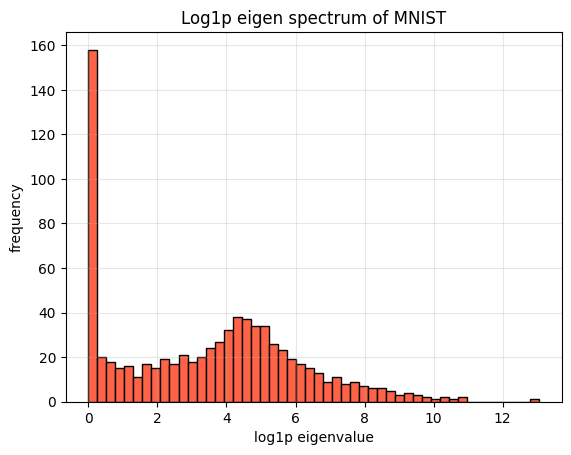

In [9]:
logeigv = np.log1p(eigv)
plt.hist(logeigv, bins=50, color='tomato', edgecolor='black')
plt.title("Log1p eigen spectrum of MNIST")
plt.grid(alpha=0.3)
plt.xlabel('log1p eigenvalue')
plt.ylabel('frequency')
plt.show();

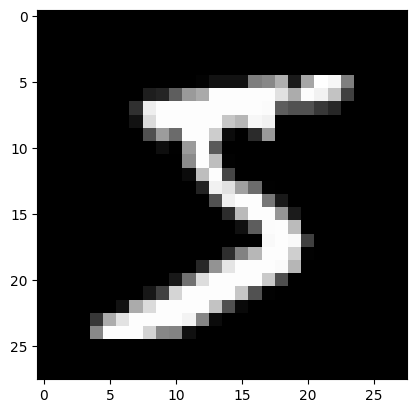

In [10]:
import matplotlib.pyplot as plt
plt.imshow(to_img(X[0]), cmap='gray') # show the first image

# do it properly with pca.

In [11]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

k = 60000
transform = transforms.Compose([transforms.ToTensor()])
flatten = transforms.Lambda(lambda x: x.flatten())
to_img = lambda x: transforms.ToPILImage()(torch.tensor(x).view(28, 28))
trainset_mnist = datasets.MNIST(root='data', train=True, download=True, transform=transform)
X_mnist = np.stack([x.flatten() for idx, (x, _) in enumerate(trainset_mnist) if idx < k])

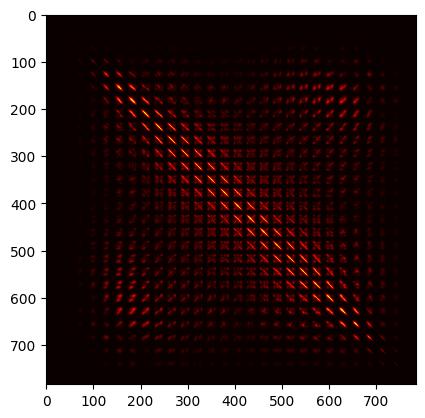

In [12]:
X_centered_mnist = X_mnist - np.mean(X_mnist, axis=0)
cov_matrix_mnist = X_centered_mnist.T @ X_centered_mnist
plt.imshow(abs(cov_matrix_mnist), cmap='hot');

In [13]:
eigenvalues_mnist, eigenvectors_mnist = np.linalg.eig(cov_matrix_mnist)
# Might get some complex dust due to precision.
eigenvalues_mnist = np.real(eigenvalues_mnist)
eigenvectors_mnist = np.real(eigenvectors_mnist)

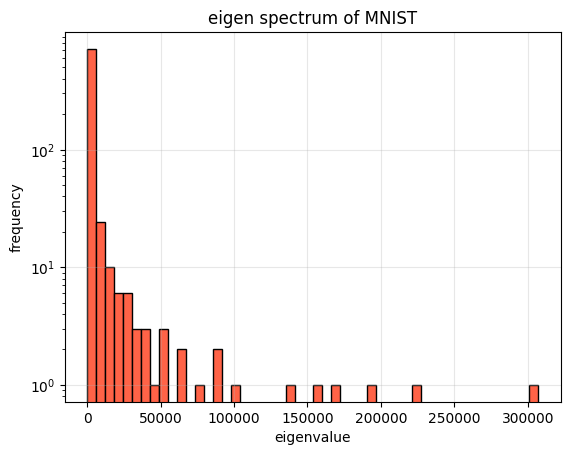

In [14]:
logeigv_mnist = np.log1p(eigenvalues_mnist)
plt.hist(eigenvalues_mnist, bins=50, color='tomato', edgecolor='black')
plt.title("eigen spectrum of MNIST")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
plt.show();

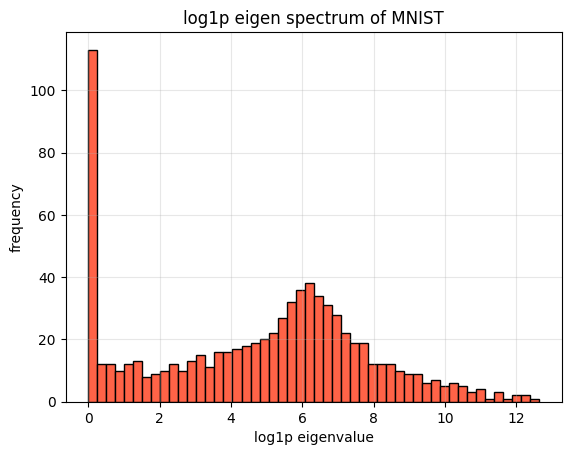

In [15]:
logeigv_mnist = np.log1p(eigenvalues_mnist)
plt.hist(logeigv_mnist, bins=50, color='tomato', edgecolor='black')
plt.title("log1p eigen spectrum of MNIST")
plt.grid(alpha=0.3)
plt.xlabel('log1p eigenvalue')
plt.ylabel('frequency')
plt.show();

In [16]:
sorted_indices_mnist = np.argsort(eigenvalues_mnist)[::-1]
sorted_eigenvectors_mnist = eigenvectors_mnist[:, sorted_indices_mnist]
Xproj_mnist = np.dot(sorted_eigenvectors_mnist.T, X_mnist[0])

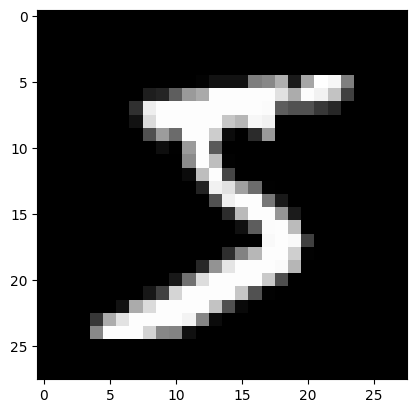

In [17]:
plt.imshow(to_img(X_mnist[0]), cmap='gray'); # show the first image.

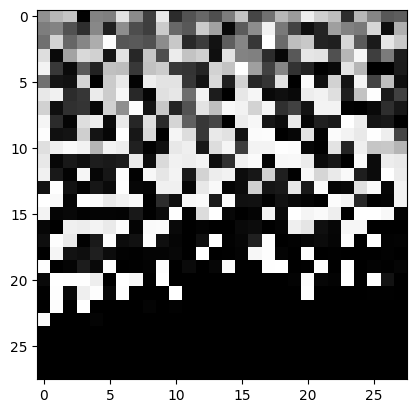

In [18]:
plt.imshow(to_img(Xproj_mnist), cmap='gray'); # show the first image in the new basis.

# same with cifar10.

In [19]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

# transform = transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),  # convert to greyscale
#     transforms.ToTensor(),
#     transforms.Lambda(lambda x: x.view(-1))
# ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x[0, :, :]), # pick only the first channel
    transforms.Lambda(lambda x: x.view(-1))
])

to_img = lambda x: transforms.ToPILImage()(torch.tensor(x).view(1, 32, 32))
trainset_cifar10 = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
X_cifar10 = np.stack([x.numpy() for idx, (x, _) in enumerate(trainset_cifar10)])
y_cifar10 = np.stack([y for idx, (_, y) in enumerate(trainset_cifar10)])

Files already downloaded and verified


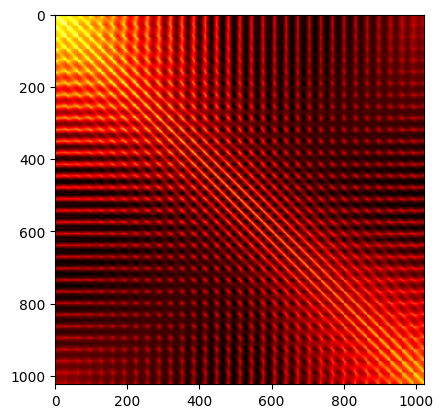

In [20]:
X_centered_cifar10 = X_cifar10 - np.mean(X_cifar10, axis=0)
cov_matrix_cifar10 = X_centered_cifar10.T @ X_centered_cifar10
plt.imshow(abs(cov_matrix_cifar10), cmap='hot');

In [21]:
np.linalg.matrix_rank(cov_matrix_cifar10, tol=0.1)

1024

In [22]:
def stable_rank(M):
    frob = np.linalg.norm(M, 'fro')
    spec = np.linalg.norm(M, 2)
    return (frob**2) / (spec**2)

In [23]:
def effective_rank(A, threshold=0.01):
    U, s, V = np.linalg.svd(A, full_matrices=False)
    normalized_singular_values = s / np.sum(s)
    return np.sum(normalized_singular_values > threshold)

In [24]:
effective_rank(cov_matrix_cifar10)

14

In [25]:
stable_rank(cov_matrix_cifar10)

1.3086789451751972

In [26]:
eigenvalues_cifar10, eigenvectors_cifar10 = np.linalg.eig(cov_matrix_cifar10)

# Might get some complex dust due to precision.
eigenvalues_cifar10 = np.real(eigenvalues_cifar10)
eigenvectors_cifar10 = np.real(eigenvectors_cifar10)

# Order the eigenvalues by their magnitude.
sorted_indices_cifar10 = np.argsort(eigenvalues_cifar10)[::-1]
eigenvalues_cifar10 = eigenvalues_cifar10[sorted_indices_cifar10]
eigenvectors_cifar10 = eigenvectors_cifar10[:, sorted_indices_cifar10]

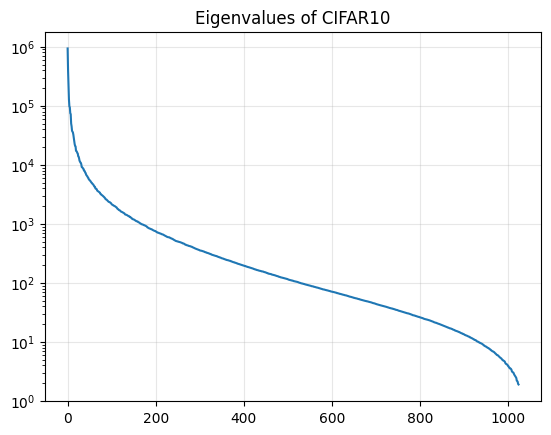

In [27]:
plt.plot(eigenvalues_cifar10)
plt.title("Eigenvalues of CIFAR10")
plt.grid(alpha=0.3)
plt.yscale('log')
plt.show();

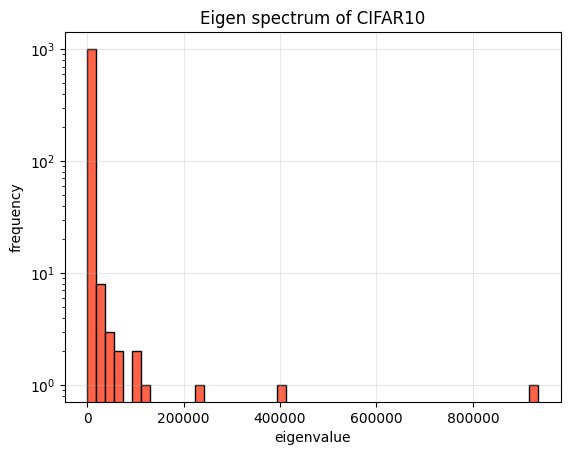

In [28]:
logeigv_cifar10 = np.log1p(eigenvalues_cifar10)
plt.hist(eigenvalues_cifar10, bins=50, color='tomato', edgecolor='black')
plt.title("Eigen spectrum of CIFAR10")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
plt.show();

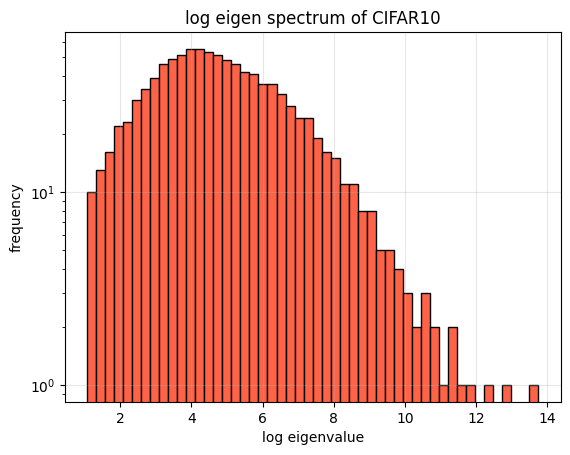

In [29]:
logeigv_cifar10 = np.log1p(eigenvalues_cifar10)
plt.hist(logeigv_cifar10, bins=50, color='tomato', edgecolor='black')
plt.title("log eigen spectrum of CIFAR10")
plt.grid(alpha=0.3)
plt.xlabel('log eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
plt.show();

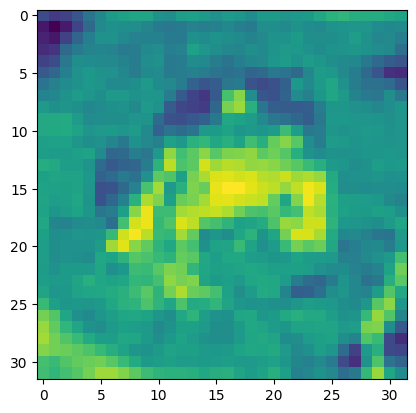

In [30]:
plt.imshow(to_img(X_cifar10[0])); # show the first image.

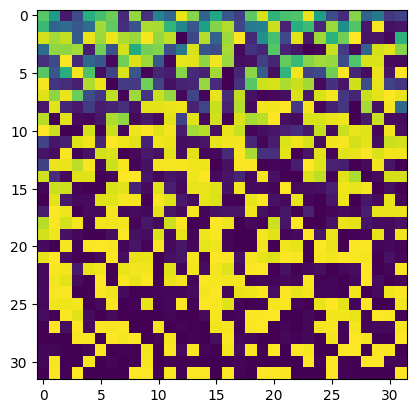

In [31]:
Xproj_cifar10 = np.dot(eigenvectors_cifar10.T, X_cifar10[0])
X_cifar10_proj = [np.dot(eigenvectors_cifar10.T, x) for x in X_cifar10]
plt.imshow(to_img(Xproj_cifar10)) # show the first image in the new basis.

# same with cifar100.

In [32]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.flatten())  # Flatten the images directly in the transform
])

# Define the transformation: convert images to grayscale, then to tensors
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert images to grayscale
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images
])

to_img = lambda x: transforms.ToPILImage()(torch.tensor(x).view(1, 32, 32))
trainset = datasets.CIFAR100(root='data', train=True, download=True, transform=transform)
X = np.stack([x.numpy() for idx, (x, _) in enumerate(trainset)])

Files already downloaded and verified


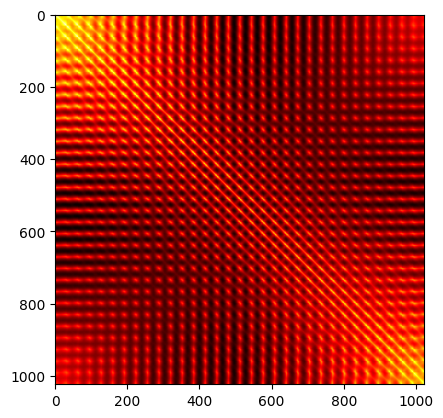

In [33]:
X_centered = X - np.mean(X, axis=0)
cov_matrix_cifar100 = X_centered.T @ X_centered
plt.imshow(abs(cov_matrix_cifar100), cmap='hot');

In [34]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_cifar100)

# Might get some complex dust due to precision.
eigenvalues_cifar100 = np.real(eigenvalues)
eigenvectors_cifar100 = np.real(eigenvectors)

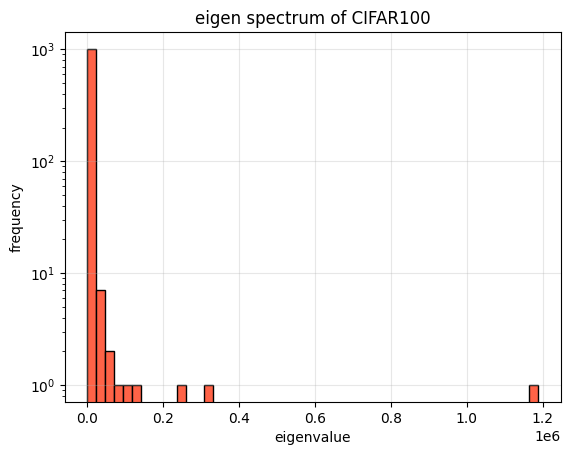

In [35]:
logeigv_cifar100 = np.log1p(eigenvalues_cifar100)
plt.hist(eigenvalues_cifar100, bins=50, color='tomato', edgecolor='black')
plt.title("eigen spectrum of CIFAR100")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
#plt.xscale('log')
plt.show();

In [36]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
Xproj = np.dot(sorted_eigenvectors.T, X[0])

# put the plot together for paper.

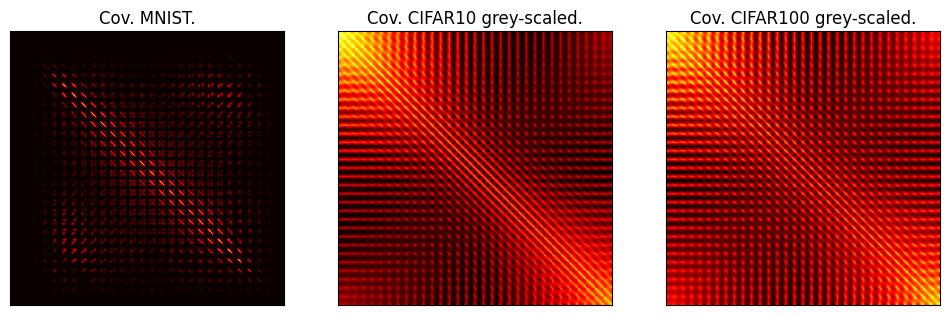

In [37]:
# plot on a row the three covariance matrices. mnist, cifar10, cifar_100
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(abs(cov_matrix_mnist), cmap='hot')
plt.title('Cov. MNIST.')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(abs(cov_matrix_cifar10), cmap='hot')
plt.title('Cov. CIFAR10 grey-scaled.')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(abs(cov_matrix_cifar100), cmap='hot')
plt.title('Cov. CIFAR100 grey-scaled.')
plt.xticks([])
plt.yticks([])

plt.show();

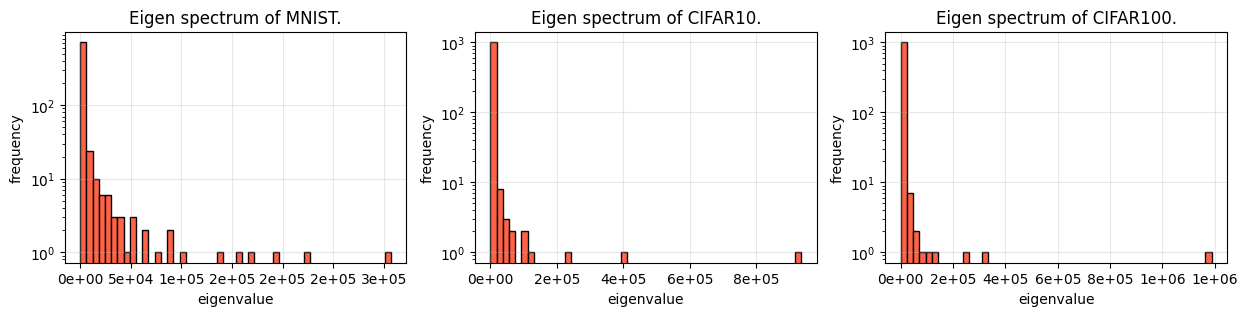

In [38]:
import matplotlib.ticker as ticker
locator = ticker.MaxNLocator(nbins=8)

# same with histograms of spectrum.
plt.figure(figsize=(15, 3))

plt.subplot(1, 3, 1)
plt.hist(eigenvalues_mnist, bins=50, color='tomato', edgecolor='black')
plt.title("Eigen spectrum of MNIST.")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # Scientific notation

plt.subplot(1, 3, 2)
plt.hist(eigenvalues_cifar10, bins=50, color='tomato', edgecolor='black')
plt.title("Eigen spectrum of CIFAR10.")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
#plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # Scientific notation

plt.subplot(1, 3, 3)
plt.hist(eigenvalues_cifar100, bins=50, color='tomato', edgecolor='black')
plt.title("Eigen spectrum of CIFAR100.")
plt.grid(alpha=0.3)
plt.xlabel('eigenvalue')
plt.ylabel('frequency')
plt.yscale('log')
#plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # Scientific notation

plt.show();

# A quick excursion on lasso/ridge regression to solve CIFAR10.

In [39]:
# Perform ridge regression on the dataset.
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# m = Lasso(alpha=0.05)
m = Ridge(alpha=1.0)

m.fit(X_cifar10_proj, y_cifar10);
coeffs = m.coef_

# Order the params by their abs magnitude.
sidx = np.argsort(abs(coeffs))[::-1]
params = abs(coeffs)[sidx]

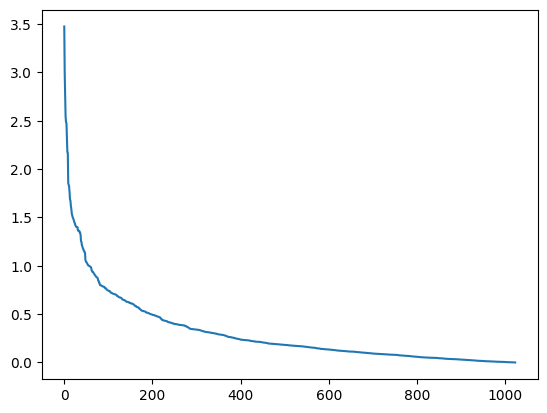

In [40]:
plt.plot(params);

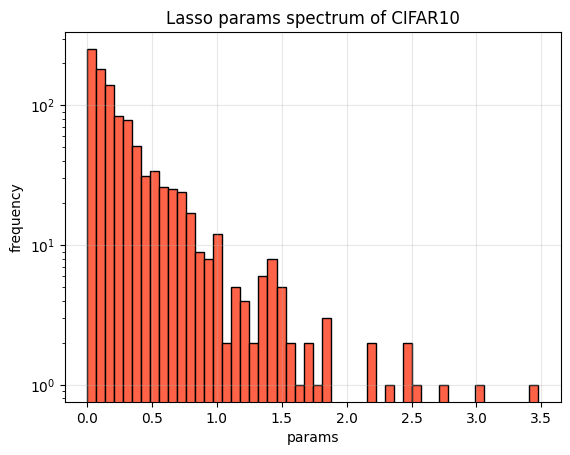

In [41]:
plt.hist(params, bins=50, color='tomato', edgecolor='black')
plt.title("Lasso params spectrum of CIFAR10")
plt.grid(alpha=0.3)
plt.xlabel('params')
plt.ylabel('frequency')
plt.yscale('log')
plt.show();

In [42]:
from sklearn.metrics import accuracy_score
y_pred = m.predict(X_cifar10_proj)
y_pred = np.rint(y_pred)  # Rounds to the nearest integer
accuracy_score(y_cifar10, y_pred)

0.1104